In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo
df = pd.read_csv("Meta_FNCER__Incorporar_en_la_matriz_energ_tica_nueva_capacidad_instalada_a_partir_de_Fuentes_No_Convencionales_de_Energ_a_Renovable_-_FNCER_20250813.csv")

# Convertir fecha a datetime
df["Fecha estimada FPO"] = pd.to_datetime(df["Fecha estimada FPO"], errors="coerce")

# Crear nuevas columnas
df["Año FPO"] = df["Fecha estimada FPO"].dt.year
df["Factor de capacidad"] = df["Energía [kWh/día]"] / (df["Capacidad"] * 24)
df["COP por MW"] = df["Inversión estimada [COP]"] / df["Capacidad"]
df["CO2 por MW"] = df["Emisiones CO2 [Ton/año]"] / df["Capacidad"]

# Vista general
print(df.head())


                           Proyecto    Tipo  Capacidad     Departamento  \
0                         JEPIRACHI  Eólico      18.42       LA GUAJIRA   
1          AUTOG CELSIA SOLAR YUMBO   Solar       9.80  VALLE DEL CAUCA   
2              CELSIA SOLAR BOLIVAR   Solar       8.06          BOLÍVAR   
3  EL PASO SOLAR (ENEL GREEN POWER)   Solar      67.00            CESAR   
4                SOLAR CASTILLA ECP   Solar      20.00             META   

           Municipio  Código Departamento  Código Municipio  \
0             URIBIA                   44             44847   
1              YUMBO                   76             76892   
2         SANTA ROSA                   13             13683   
3            EL PASO                   20             20250   
4  CASTILLA LA NUEVA                   50             50150   

  Fecha estimada FPO  Energía [kWh/día]  Usuarios  Inversión estimada [COP]  \
0         2004-04-27             176832     30665               79206000000   
1         20

In [2]:
totales = {
    "Capacidad total (MW)": df["Capacidad"].sum(),
    "Energía total (kWh/día)": df["Energía [kWh/día]"].sum(),
    "Inversión total (COP)": df["Inversión estimada [COP]"].sum(),
    "Empleos totales": df["Empleos estimados"].sum(),
    "Emisiones CO₂ totales (Ton/año)": df["Emisiones CO2 [Ton/año]"].sum()
}

promedios = df[["Capacidad", "Energía [kWh/día]", "Inversión estimada [COP]", "Empleos estimados", "Emisiones CO2 [Ton/año]"]].mean()

print("Totales:\n", totales)
print("\nPromedios por proyecto:\n", promedios)


Totales:
 {'Capacidad total (MW)': np.float64(5999.519999999999), 'Energía total (kWh/día)': np.int64(36544773), 'Inversión total (COP)': np.int64(22919198800000), 'Empleos totales': np.int64(35014), 'Emisiones CO₂ totales (Ton/año)': np.int64(10671077)}

Promedios por proyecto:
 Capacidad                   3.797165e+01
Energía [kWh/día]           2.312960e+05
Inversión estimada [COP]    1.450582e+11
Empleos estimados           2.216076e+02
Emisiones CO2 [Ton/año]     6.753846e+04
dtype: float64


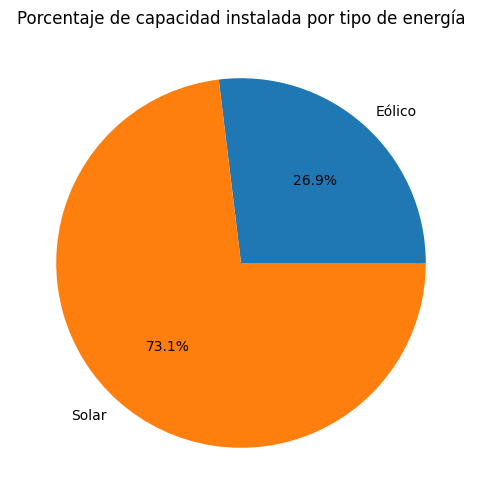

In [3]:
# Conteo de proyectos por tipo
conteo_tipo = df["Tipo"].value_counts()

# Capacidad total por tipo
capacidad_tipo = df.groupby("Tipo")["Capacidad"].sum()

# Gráfico de pastel
plt.figure(figsize=(6,6))
capacidad_tipo.plot(kind="pie", autopct="%1.1f%%")
plt.title("Porcentaje de capacidad instalada por tipo de energía")
plt.ylabel("")
plt.show()


C:\Users\MARIA JOSE\AppData\Local\Temp\ipykernel_25108\803237184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cap_dep.values, y=cap_dep.index, palette="viridis")


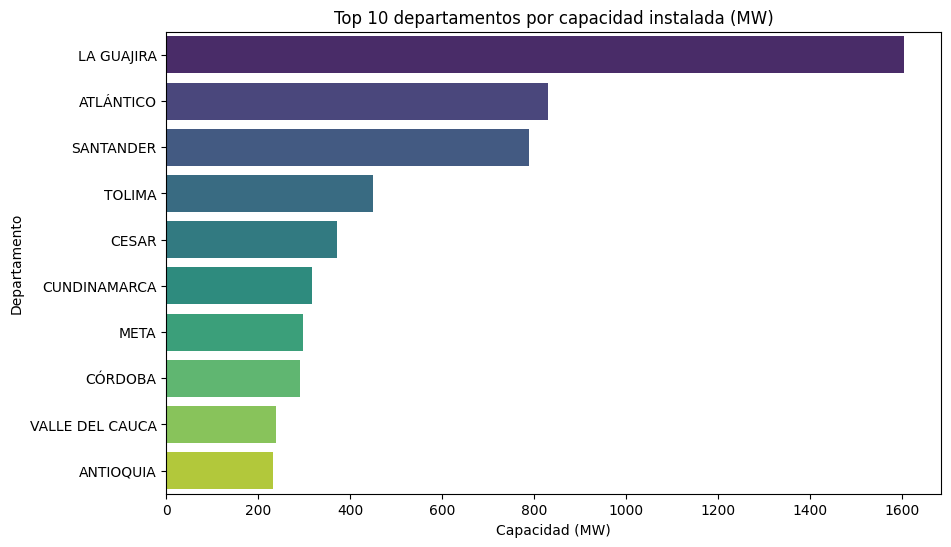

In [4]:
# Top 10 departamentos por capacidad instalada
cap_dep = df.groupby("Departamento")["Capacidad"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=cap_dep.values, y=cap_dep.index, palette="viridis")
plt.title("Top 10 departamentos por capacidad instalada (MW)")
plt.xlabel("Capacidad (MW)")
plt.ylabel("Departamento")
plt.show()


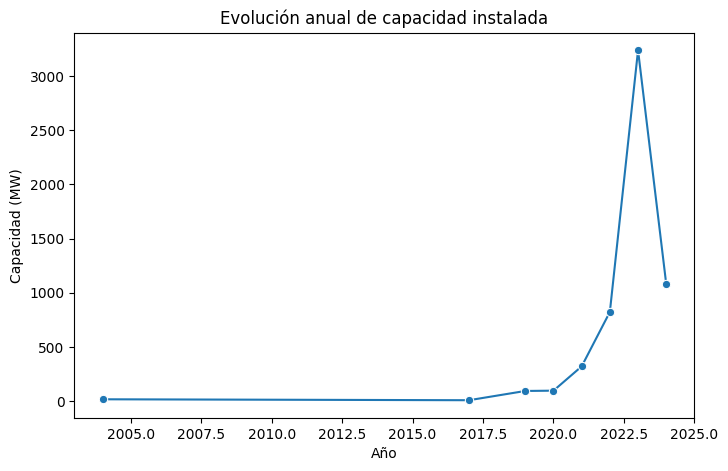

In [5]:
cap_anual = df.groupby("Año FPO")["Capacidad"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=cap_anual.index, y=cap_anual.values, marker="o")
plt.title("Evolución anual de capacidad instalada")
plt.xlabel("Año")
plt.ylabel("Capacidad (MW)")
plt.show()


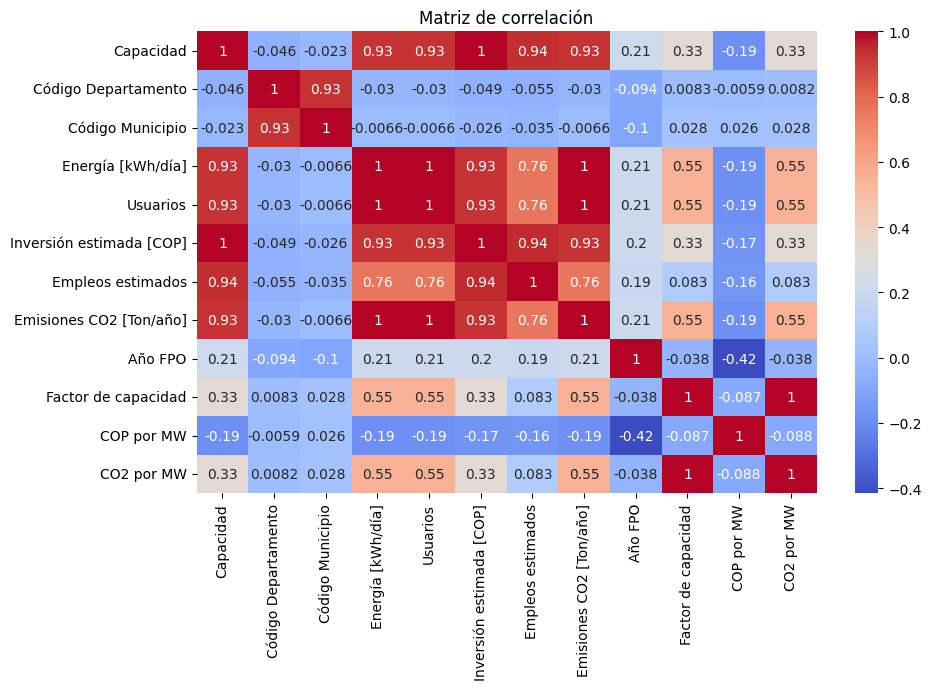

In [6]:
variables_numericas = df.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(variables_numericas.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


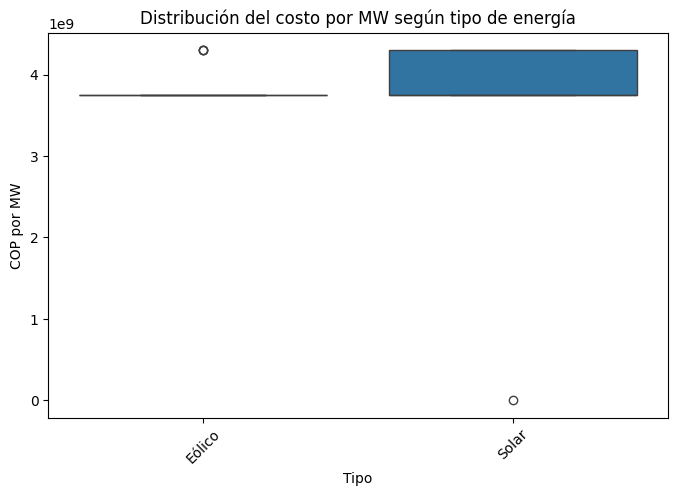

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Tipo", y="COP por MW", data=df)
plt.title("Distribución del costo por MW según tipo de energía")
plt.ylabel("COP por MW")
plt.xticks(rotation=45)
plt.show()


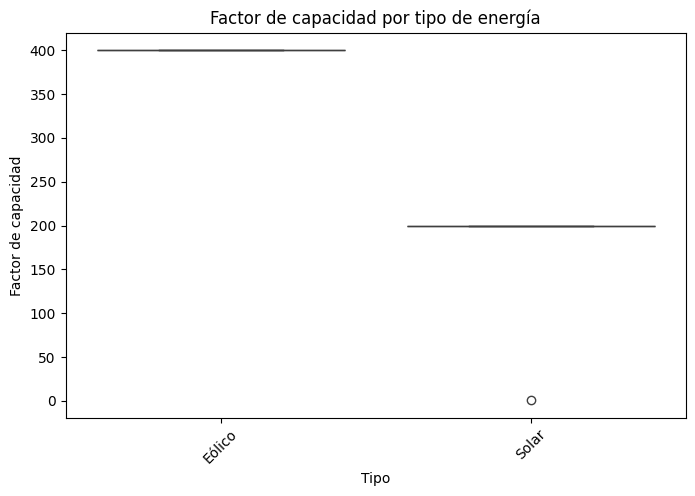

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Tipo", y="Factor de capacidad", data=df)
plt.title("Factor de capacidad por tipo de energía")
plt.ylabel("Factor de capacidad")
plt.xticks(rotation=45)
plt.show()
